In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()
# assert x_train.shape == (60000, 28, 28)
# assert x_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

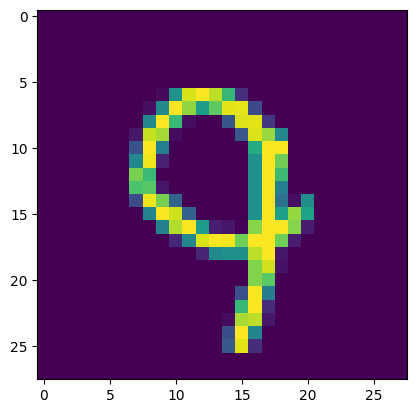

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_test[999])

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(
    y_train, num_classes=10
)

In [16]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu')) # hidden layer의 노드개수 512개, 입력을 1개 열로 입력, 필터 activation은 relu
model.add(Dense(10, activation='softmax')) # output layer는 노드 10개, 필터는 softmax

In [18]:
categorical_crossentropy = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(
    x=x_train,
    y=y_train,
    batch_size=100,
    epochs=1000,
    verbose='auto',
    callbacks=None
)

Epoch 1/1000
600/600 [==============================] - 12s 17ms/step - loss: 3.8851 - accuracy: 0.9104
Epoch 2/1000
600/600 [==============================] - 10s 16ms/step - loss: 0.5092 - accuracy: 0.9526
Epoch 3/1000
600/600 [==============================] - 11s 18ms/step - loss: 0.2738 - accuracy: 0.9634
Epoch 4/1000
600/600 [==============================] - 11s 18ms/step - loss: 0.2030 - accuracy: 0.9710
Epoch 5/1000
600/600 [==============================] - 12s 20ms/step - loss: 0.1955 - accuracy: 0.9725
Epoch 6/1000
600/600 [==============================] - 10s 17ms/step - loss: 0.1949 - accuracy: 0.9717
Epoch 7/1000
600/600 [==============================] - 10s 17ms/step - loss: 0.1905 - accuracy: 0.9725
Epoch 8/1000
600/600 [==============================] - 12s 20ms/step - loss: 0.1683 - accuracy: 0.9743
Epoch 9/1000
600/600 [==============================] - 12s 19ms/step - loss: 0.1493 - accuracy: 0.9762
Epoch 10/1000
600/600 [==============================] - 11s 18m

In [23]:
y_test_1 = to_categorical(
    y_test, num_classes=10
)